In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
#load in training dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#look at sample
train_df.head(20)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [4]:
#total count of records
train_df.count()

id           750000
age          750000
job          750000
marital      750000
education    750000
default      750000
balance      750000
housing      750000
loan         750000
contact      750000
day          750000
month        750000
duration     750000
campaign     750000
pdays        750000
previous     750000
poutcome     750000
y            750000
dtype: int64

In [5]:
#check datatypes of columns
train_df.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [6]:
#check balane of target variables
train_df['y'].value_counts()
#imbalance

y
0    659512
1     90488
Name: count, dtype: int64

In [7]:
# Count null values in each column of train_df
null_counts_train = train_df.isnull().sum()
print("\nNull counts in train_df:")
print(null_counts_train)


Null counts in train_df:
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
#separate out numerical columns and categorical columns for exploratory data analysis
numerical_columns = train_df.drop(['id','y'],axis=1).select_dtypes('int64').columns
categorical_columns = train_df.select_dtypes('object').columns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

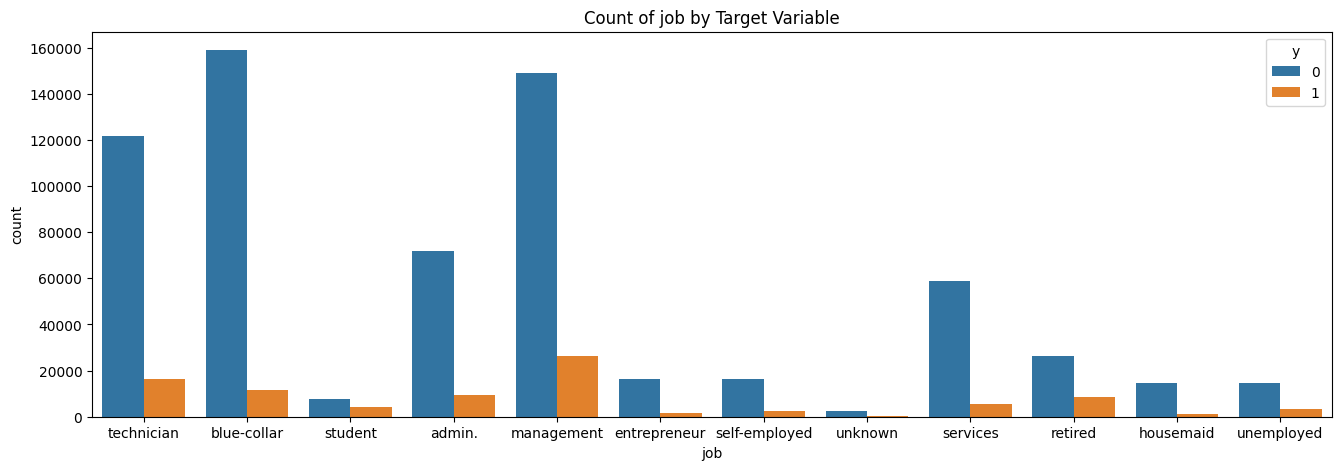

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

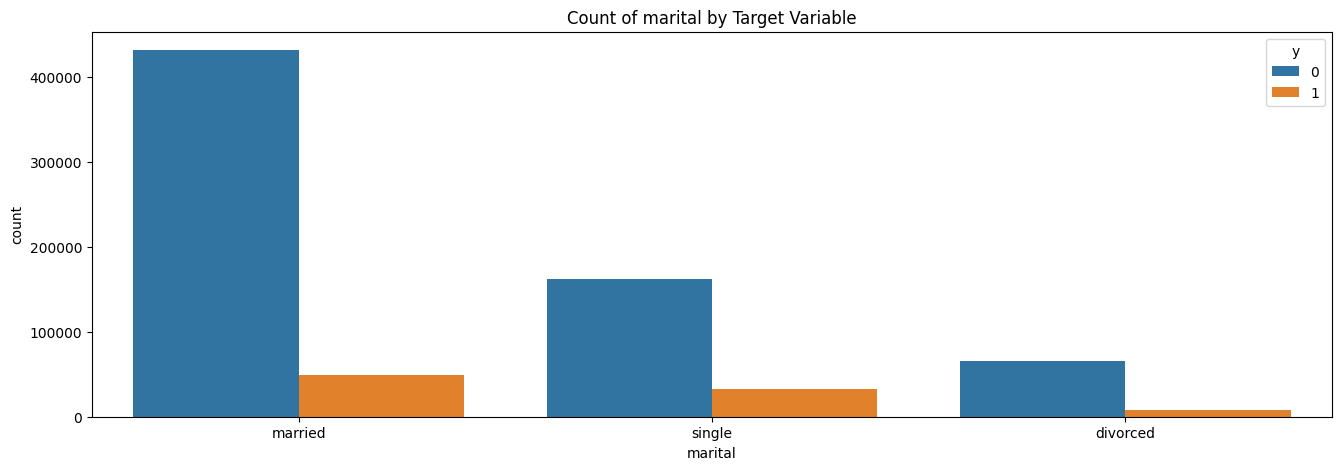

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

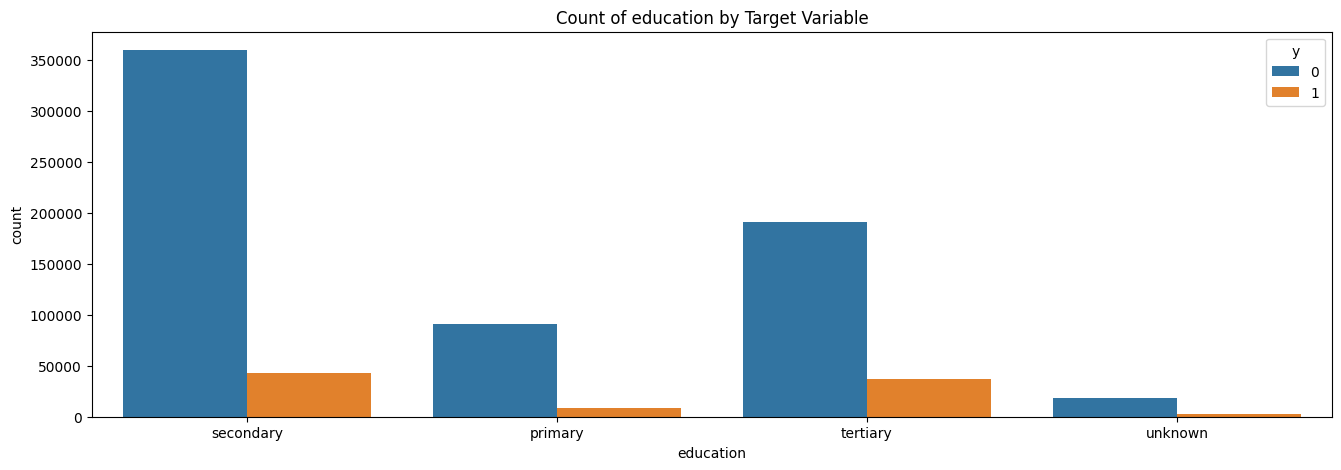

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

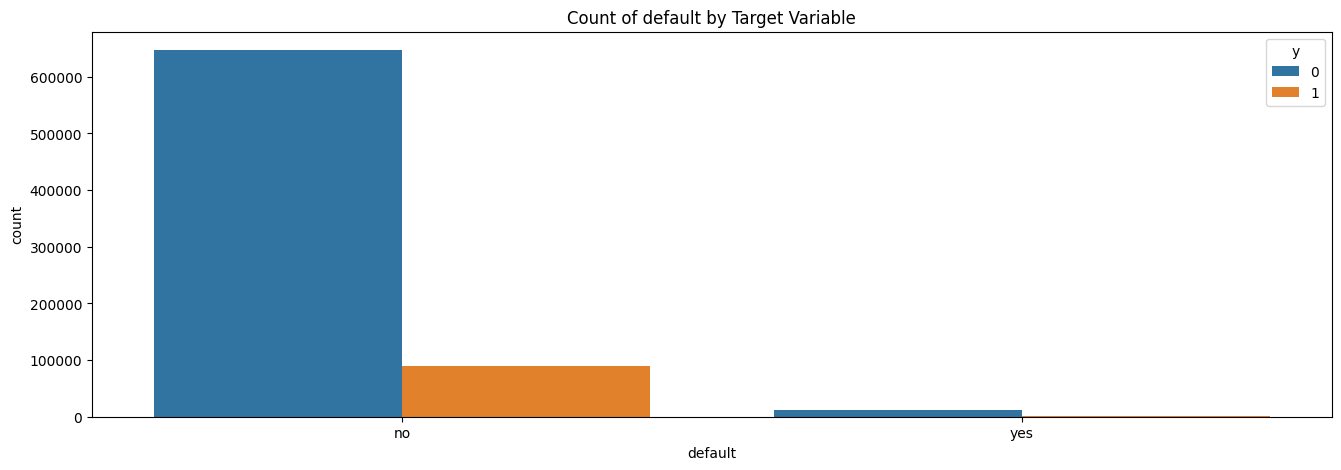

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

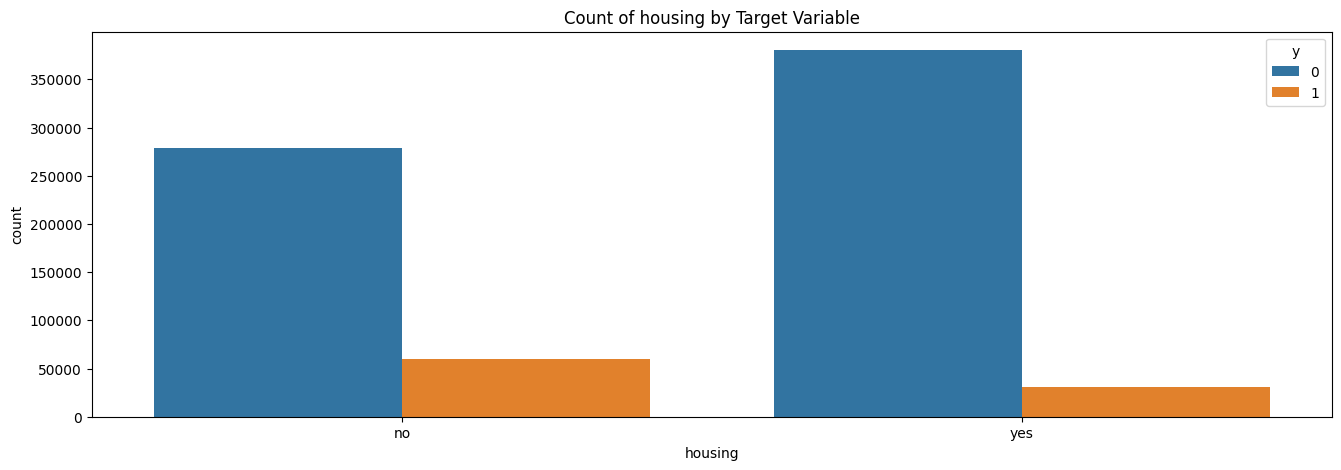

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

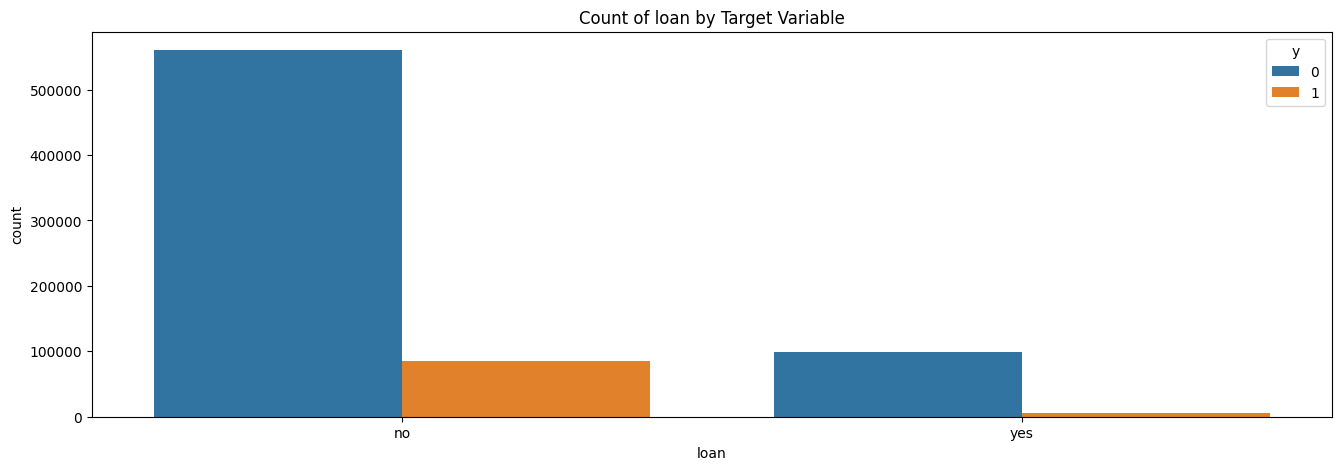

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

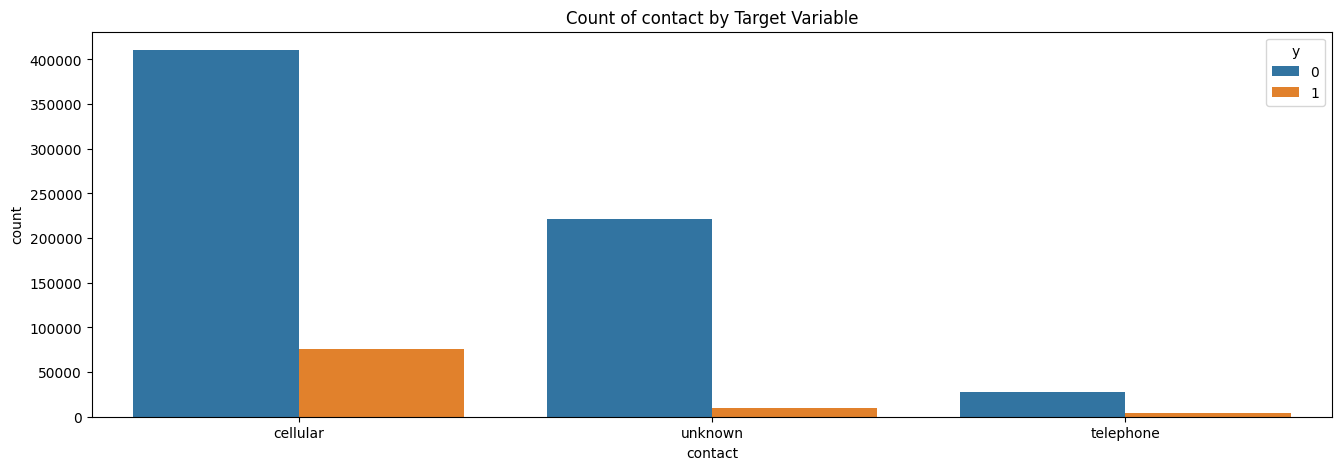

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

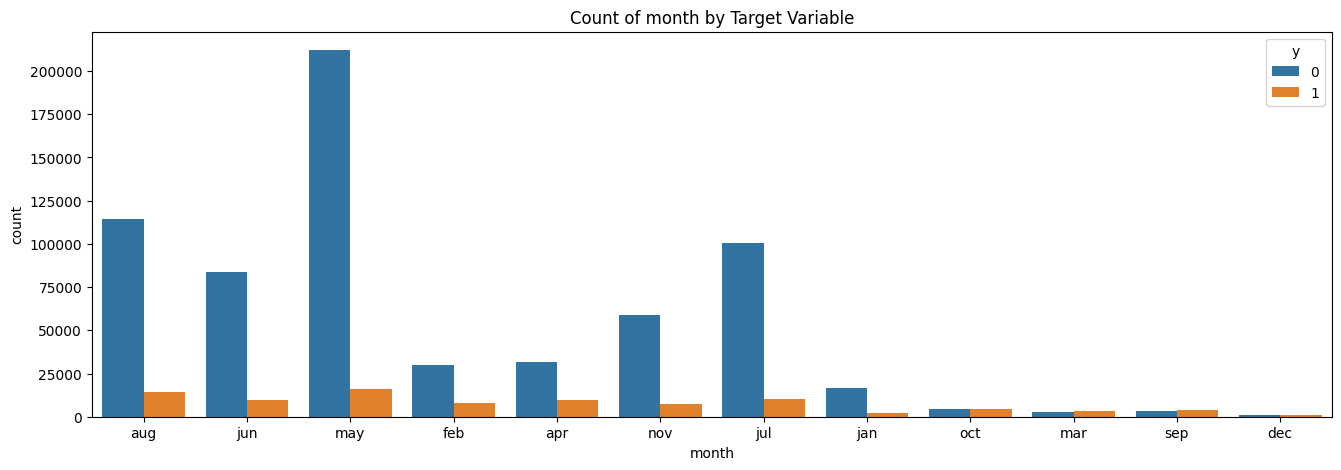

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

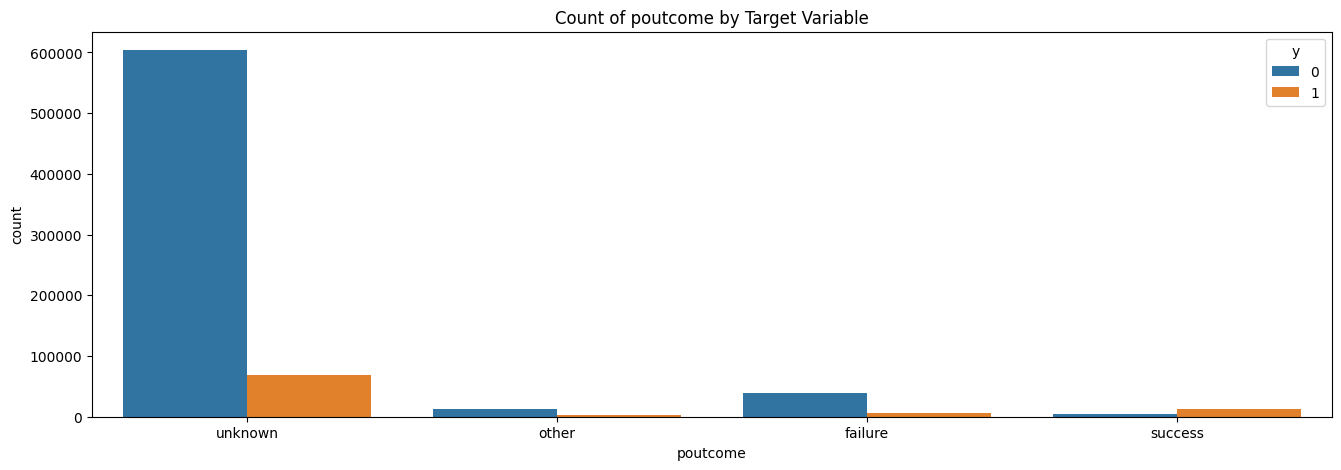

In [9]:
#provide counts of each category by success/failure
for column in categorical_columns:
    plt.figure(figsize=(16, 5))
    sns.countplot(data=train_df, x=column, hue='y')
    plt.title(f'Count of {column} by Target Variable')
    plt.show()
            
        

In [10]:
#check chi sq test for independence between cateogorical features and success/failure
for column in categorical_columns:
    contingency = pd.crosstab(train_df[column], train_df['y'])
    print(contingency)
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    print(f"Chi-square test p-value of {column}: {p}")

y                   0      1
job                         
admin.          72002   9490
blue-collar    159000  11498
entrepreneur    16276   1442
housemaid       14565   1347
management     149141  26400
retired         26521   8664
self-employed   16558   2462
services        58898   5311
student          7757   4010
technician     121766  16341
unemployed      14463   3171
unknown          2565    352
Chi-square test p-value of job: 0.0
y              0      1
marital                
divorced   66105   8302
married   431783  48976
single    161624  33210
Chi-square test p-value of marital: 0.0
y               0      1
education               
primary     91241   8269
secondary  359309  42374
tertiary   190504  37004
unknown     18458   2841
Chi-square test p-value of education: 0.0
y             0      1
default               
no       647258  89893
yes       12254    595
Chi-square test p-value of default: 5.685409277005814e-150
y             0      1
housing               
no       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


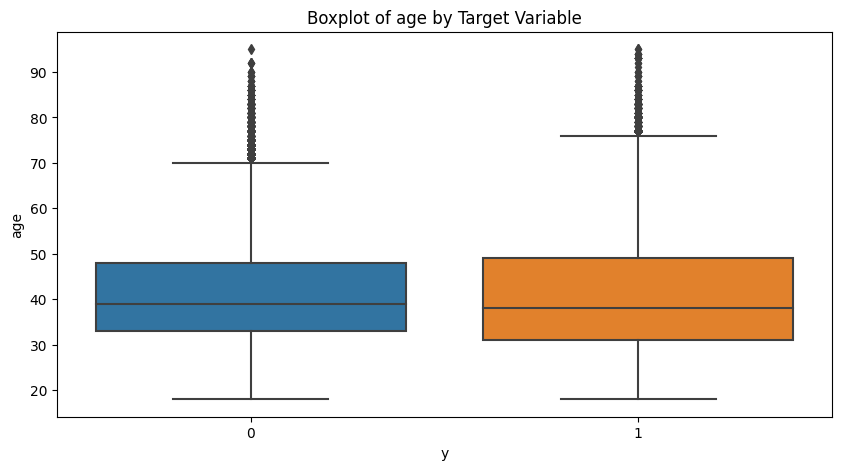

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Point-biserial corr for age and y: 0.00952328491402179 (p=1.6163439695494072e-16)


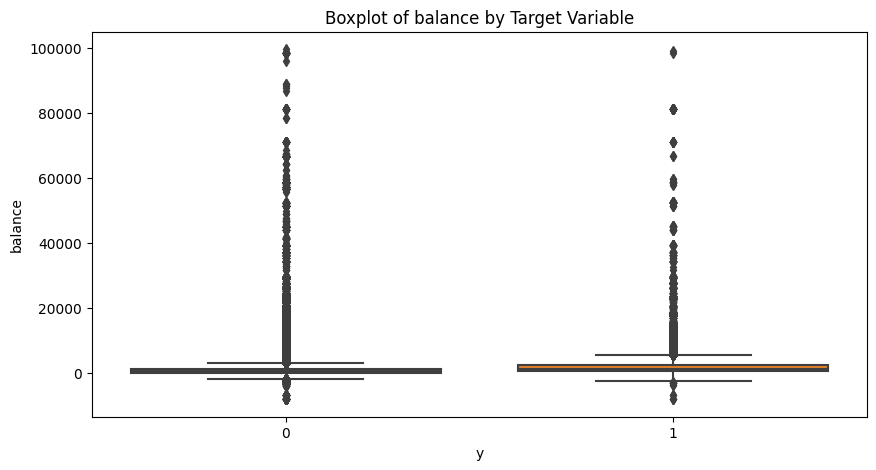

Point-biserial corr for balance and y: 0.12251318289530899 (p=0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


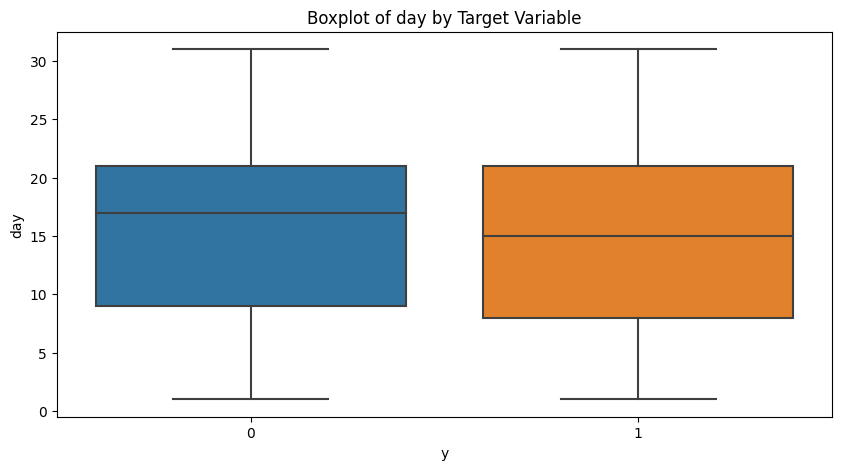

Point-biserial corr for day and y: -0.04962494817193157 (p=0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


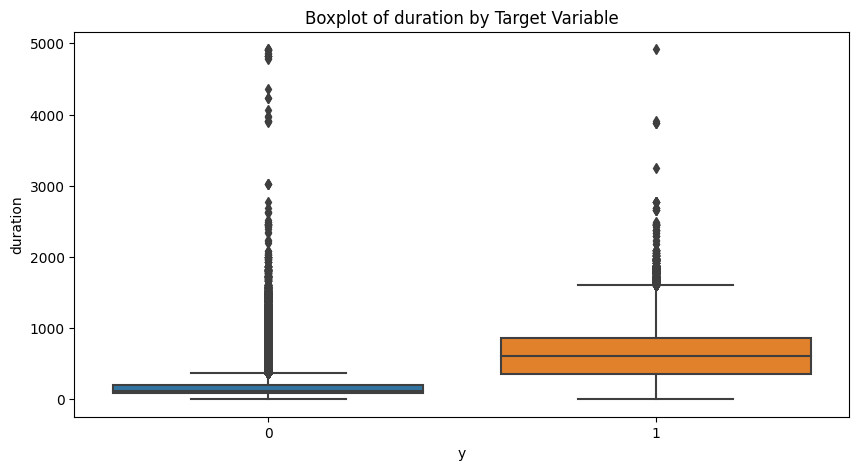

Point-biserial corr for duration and y: 0.5192829726953851 (p=0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


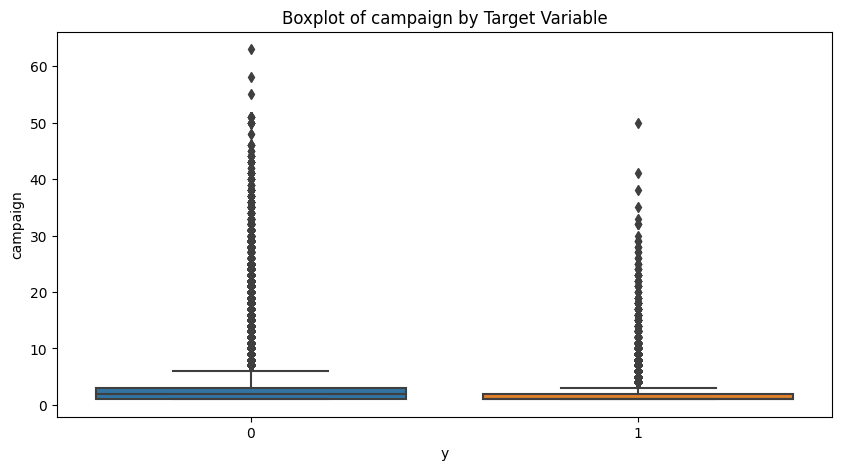

Point-biserial corr for campaign and y: -0.07582858839167819 (p=0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


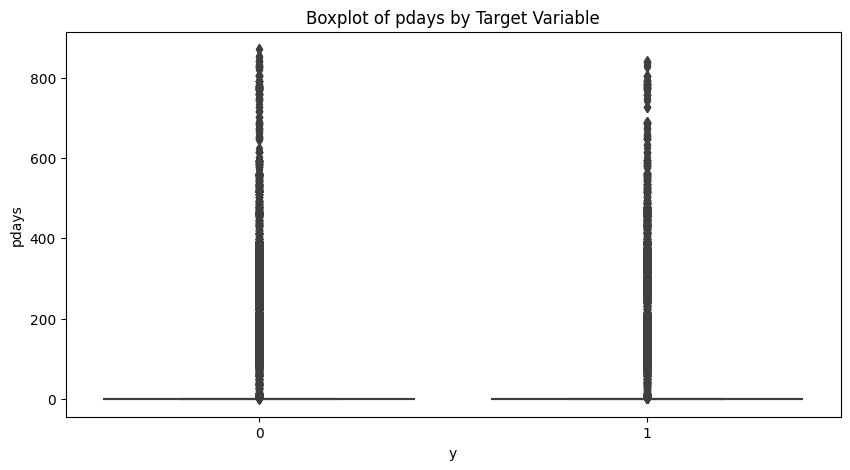

Point-biserial corr for pdays and y: 0.08927670336147817 (p=0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


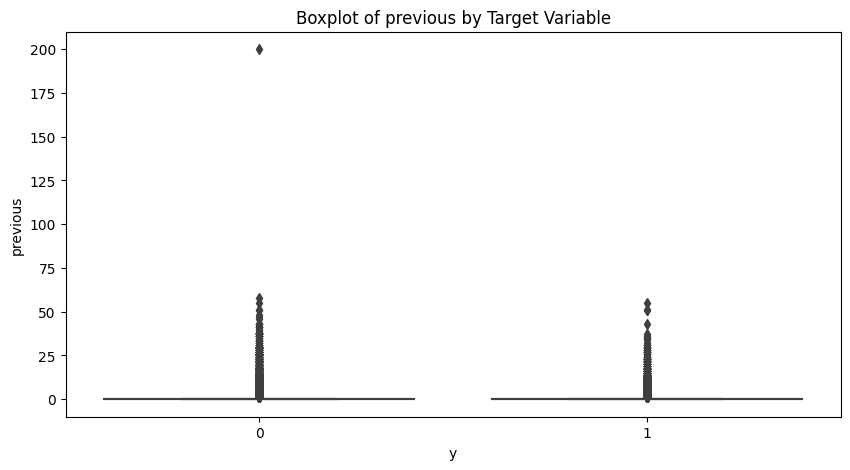

Point-biserial corr for previous and y: 0.11955185755625478 (p=0.0)


In [11]:
#numerical check distribution of numerical columns against target variable
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x='y', y=column)
    plt.title(f'Boxplot of {column} by Target Variable')
    plt.show()
    corr, p = stats.pointbiserialr(train_df[column], train_df['y'])
    print(f'Point-biserial corr for {column} and y: {corr} (p={p})')

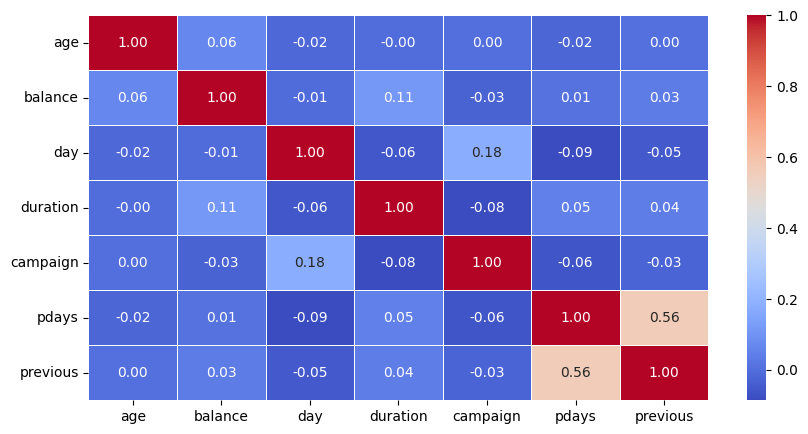

In [12]:
#build correlation matrix to evaluate any confounding variables
corr_matrix = train_df[numerical_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

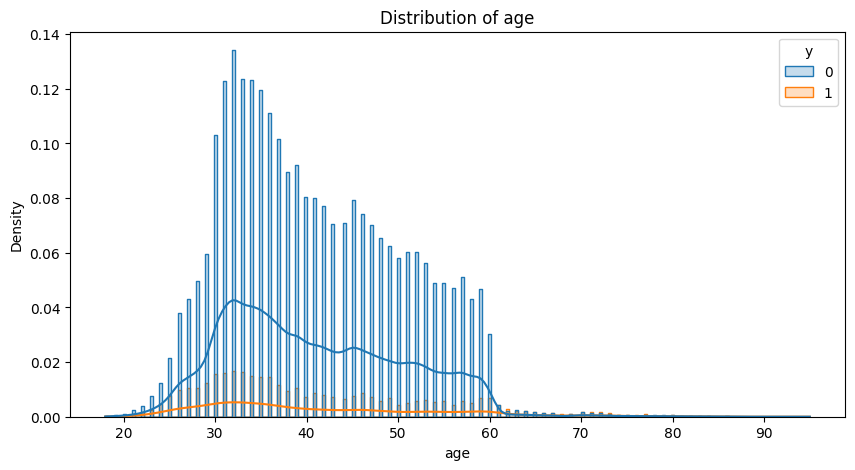

skewness of age: 0.5861373244498731


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

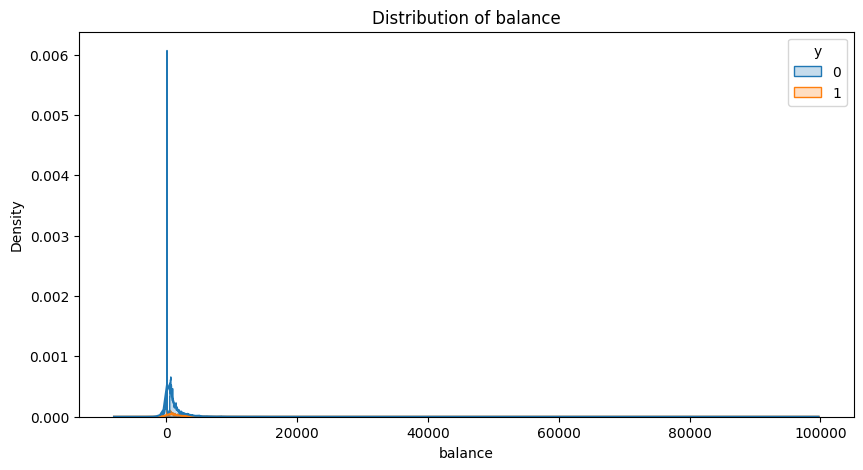

skewness of balance: 12.304122777345025


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

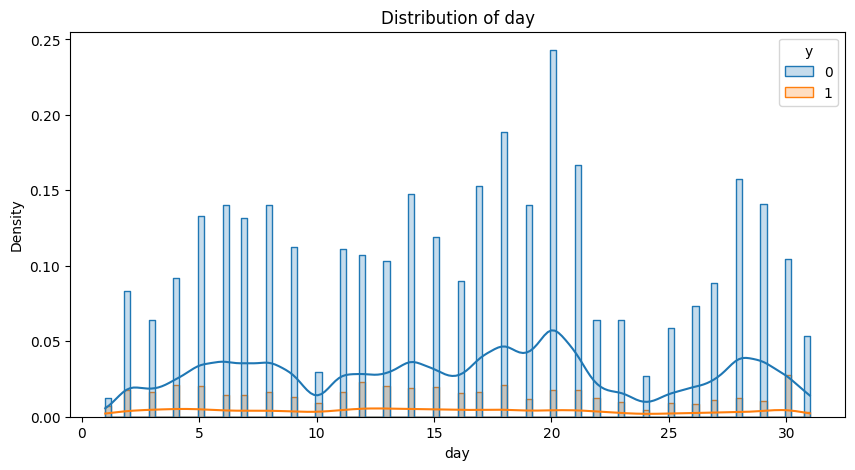

skewness of day: 0.05401417935256725


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

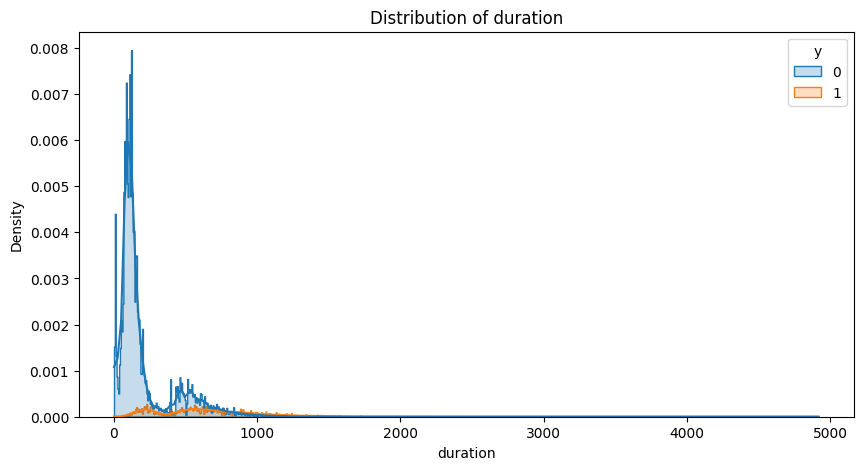

skewness of duration: 2.048776487065909


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

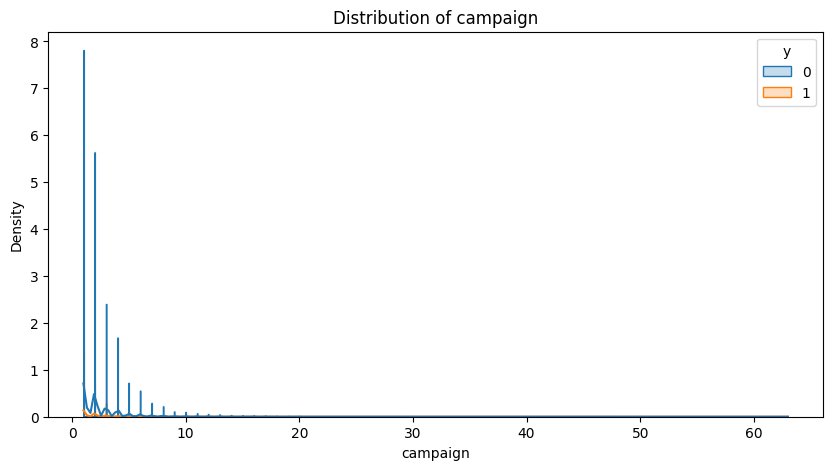

skewness of campaign: 4.810436696187615


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

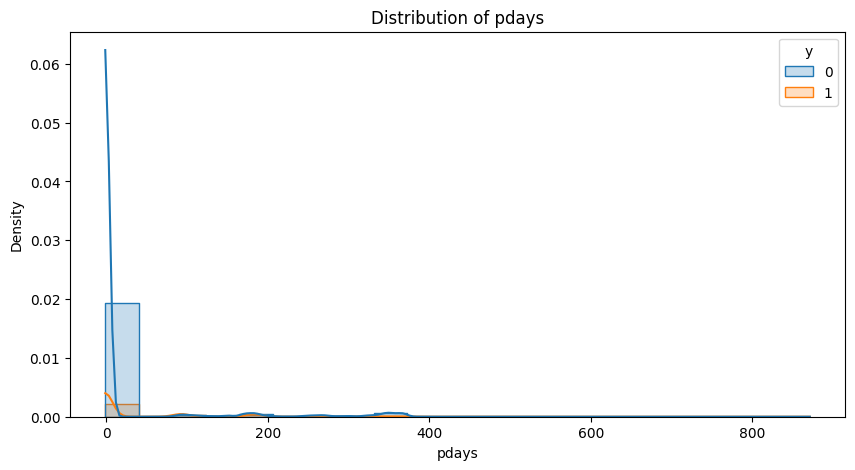

skewness of pdays: 3.6250486860732445


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

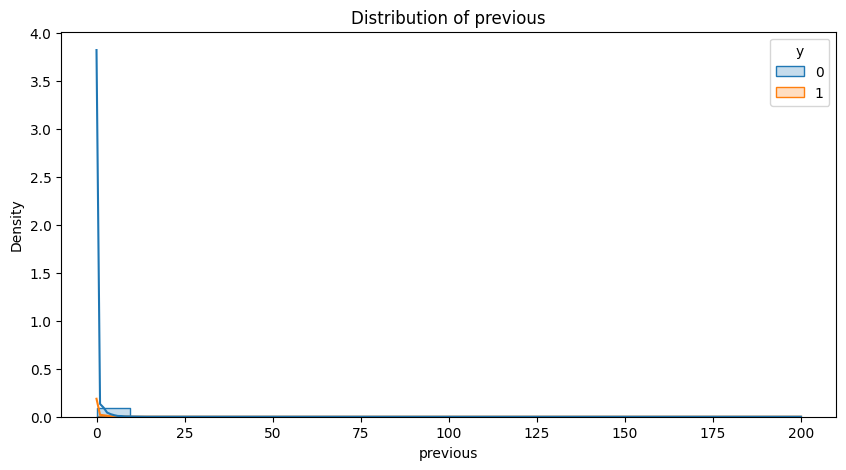

skewness of previous: 13.749885331453086


In [13]:
#check distribution of numerical variables and check for skewnes in data
for column in numerical_columns:
        plt.figure(figsize=(10,5))
        sns.histplot(data=train_df, x=column, hue='y', kde=True, element="step", stat="density")
        plt.title(f"Distribution of {column}")
        plt.show()
        print(f"skewness of {column}: {train_df[column].skew()}")

In [14]:
#create column transformer for preprocessing numerical variables by scaling and categorical variables by ohe
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [15]:
train_df_clean = train_df.drop(['y','id'],axis=1)
x_train_df = preprocessor.fit_transform(train_df_clean)
y_train_df = train_df['y']
#split data into train/test sets
x_train,x_test,y_train,y_test=train_test_split(x_train_df,y_train_df,random_state=42,test_size=.2)


In [16]:
#create randomforesst classifier and test model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train,y_train)
#predict 
y_pred = rf.predict(x_test)
#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred)
print(accuracy)

0.809114322938697


In [17]:
#due to class imbalance lets implement smote
from imblearn.over_sampling import SMOTE

In [18]:
#use smote to account for imbalance in target variable
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [19]:
#create randomforesst classifier and test model
rf2 = RandomForestClassifier(class_weight='balanced',random_state=42)

rf2.fit(x_train_res,y_train_res)
#predict 
y_pred = rf2.predict(x_test)
#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred)
print(accuracy)

0.8532225403657039


In [20]:
#logistic regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

lr_model.fit(x_train_res, y_train_res)
y_pred_lr = lr_model.predict(x_test)

#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred_lr)

print(accuracy)


0.8723186989473584


logistic regression and random forest both perform in mid 80% roc

In [21]:
#test for best scale_pos_weight
for i in np.arange(7, 9, 0.2):
    model = XGBClassifier(scale_pos_weight=i, max_depth=6, n_estimators=150, random_state=42)
    model.fit(x_train_res, y_train_res)

    y_pred_prob = model.predict_proba(x_test)[:,1]

    y_pred = (y_pred_prob >= .5).astype(int)

    print(f"ROC AUC with scale_pos_weight={i}: {roc_auc_score(y_test, y_pred)}")

ROC AUC with scale_pos_weight=7.0: 0.9036193092776322
ROC AUC with scale_pos_weight=7.2: 0.90274946779629
ROC AUC with scale_pos_weight=7.4: 0.902736014029095
ROC AUC with scale_pos_weight=7.6000000000000005: 0.9027756094912369
ROC AUC with scale_pos_weight=7.800000000000001: 0.9026925768662368
ROC AUC with scale_pos_weight=8.0: 0.9026682679761611
ROC AUC with scale_pos_weight=8.200000000000001: 0.9033773363143486
ROC AUC with scale_pos_weight=8.400000000000002: 0.9023695322437109
ROC AUC with scale_pos_weight=8.600000000000001: 0.9021984937261444
ROC AUC with scale_pos_weight=8.8: 0.9019577804905974


In [22]:
#xgboost classifier to improve roc
model = XGBClassifier(scale_pos_weight=7.2, max_depth=6, n_estimators=150, random_state=42)
model.fit(x_train_res, y_train_res)


y_pred_prob = model.predict_proba(x_test)[:,1]


y_pred = (y_pred_prob >= .5).astype(int)


print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

ROC AUC: 0.90274946779629


xgboost performs better and to acheive higher roc we will need to perform some feature engineering

In [23]:
feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
model = XGBClassifier(scale_pos_weight=7.2, max_depth=6, n_estimators=150,random_state=42)
rfe = RFE(model, n_features_to_select=30)
x_selected = rfe.fit_transform(x_train_df,y_train_df)

In [24]:
#check which features were within the top 30 selected
selected_mask = rfe.support_

selected_features = np.array(feature_names)[selected_mask]

print(selected_features)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'job_admin.'
 'job_blue-collar' 'job_housemaid' 'job_student' 'marital_single'
 'education_tertiary' 'housing_no' 'loan_no' 'contact_cellular'
 'contact_unknown' 'month_apr' 'month_aug' 'month_dec' 'month_feb'
 'month_jan' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'poutcome_success' 'poutcome_unknown']


In [27]:
#split data into train/test sets
x_train_feature,x_test_feature,y_train_feature,y_test_feature=train_test_split(x_selected,y_train_df,random_state=42,test_size=.2)

x_train_feature_res, y_train_feature_res = smote.fit_resample(x_train_feature, y_train_feature)

In [28]:
#xgboost classifier to improve roc
model = XGBClassifier(scale_pos_weight=7.2, max_depth=6, n_estimators=150, random_state=42)
model.fit(x_train_feature_res, y_train_feature_res)


y_pred_prob = model.predict_proba(x_test_feature)[:,1]


y_pred = (y_pred_prob >= .5).astype(int)


print(f"ROC AUC: {roc_auc_score(y_test_feature, y_pred)}")

ROC AUC: 0.9030222681415616


Top X features do not provide a better performance, next step is to configure current features using interaction variables/feature conversions

In [29]:
train2df = train_df.copy()

train2df['pdays_flag'] = np.where(train2df['pdays'] == -1, 1, 0)
train2df['balance_log'] = np.sign(train2df['balance']) * np.log1p(np.abs(train2df['balance']))
train2df['duration_log'] = np.log1p(train2df['duration'])



In [30]:
x2_train_df = train2df.drop(['y','id'],axis=1)
y2_train_df = train2df['y']
#separate out numerical columns and categorical columns for exploratory data analysis
num2_col = x2_train_df.select_dtypes(['int64','float64']).columns
cat2_col = x2_train_df.select_dtypes('object').columns


In [31]:
#create column transformer for preprocessing numerical variables by scaling and categorical variables by ohe
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), num2_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat2_col)
    ]
)

In [32]:
x2_train = preprocessor.fit_transform(x2_train_df)

In [33]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_train,y2_train_df,random_state=42,test_size=.2)

In [34]:
#xgboost classifier to improve roc
model = XGBClassifier(scale_pos_weight=8.2, max_depth=6, n_estimators=150, random_state=42)
model.fit(x2_train, y2_train)


y_pred_prob = model.predict_proba(x2_test)[:,1]


y_pred = (y_pred_prob >= .5).astype(int)


print(f"ROC AUC: {roc_auc_score(y2_test, y_pred)}")

ROC AUC: 0.906934810569197


We will try model stacking for higher accuracy

In [43]:
x2_train

array([[-1.27999033,  1.37017018, -0.49900567, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.99750299,  0.03206261,  1.31899395, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.59163169, -0.42455117,  1.5613939 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.08194743,  0.0049126 ,  0.95539403, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.30435285, -0.25777255,  1.80379385, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.39358879, -0.42455117, -1.34740549, ...,  0.        ,
         0.        ,  1.        ]])

In [44]:
#define base learners
base_learners = [
    ('xgb', XGBClassifier(scale_pos_weight=8.2, max_depth=6, n_estimators=150, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
]

stacking = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42),
    cv=5
)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', ADASYN(random_state=42)),
    ('stacking', stacking)
])

scores = cross_val_score(pipeline, x2_train_df, y2_train_df, cv=StratifiedKFold(5), scoring='roc_auc')
print(f"Cross-validated ROC AUC scores: {scores}")

KeyboardInterrupt: 